**Data exploration and preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [ ]:
df= pd.read_csv('/content/cs-training.csv')

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df[df.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df[df.columns[2:]].median()

age                                       52.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.366508
MonthlyIncome                           5400.000000
NumberOfOpenCreditLinesAndLoans            8.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               1.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
dtype: float64

In [ ]:
df[df.columns[2:]].mean()

age                                       52.295207
NumberOfTime30-59DaysPastDueNotWorse       0.421033
DebtRatio                                353.005076
MonthlyIncome                           6670.221237
NumberOfOpenCreditLinesAndLoans            8.452760
NumberOfTimes90DaysLate                    0.265973
NumberRealEstateLoansOrLines               1.018240
NumberOfTime60-89DaysPastDueNotWorse       0.240387
NumberOfDependents                         0.757222
dtype: float64

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64


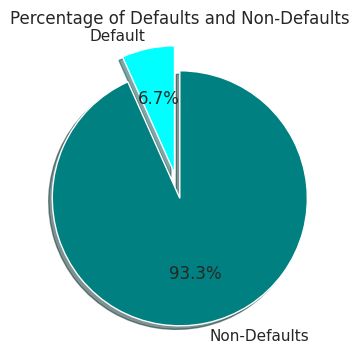

In [ ]:
print(df['SeriousDlqin2yrs'].value_counts()/df.shape[0] *100)

## Pie Chart
labels = 'Default', 'Non-Defaults'
sizes = [6.684, 93.316]
explode = (0.2, 0)
cols    = ['#00FFFF', '#008080']

fig = plt.figure(figsize = (4,4))
plt.pie(sizes, explode=explode, colors = cols, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt. title("Percentage of Defaults and Non-Defaults")
plt.show()

Text(0.5, 1.0, 'Target Distribution')

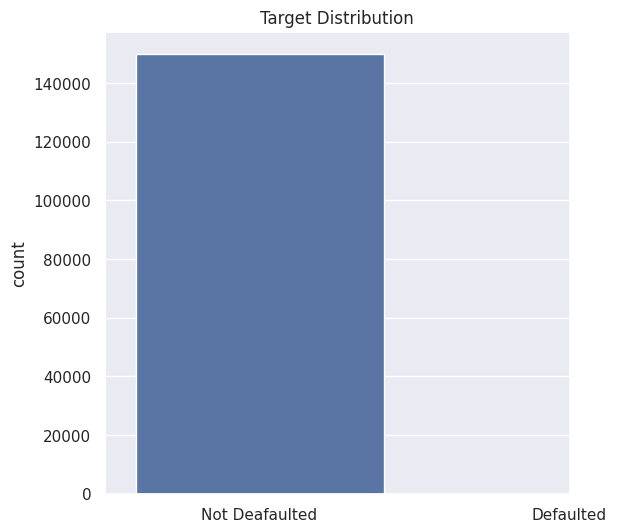

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['SeriousDlqin2yrs'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

In [ ]:
cols = list(df.columns)
cols = cols[1:]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r', 'c']

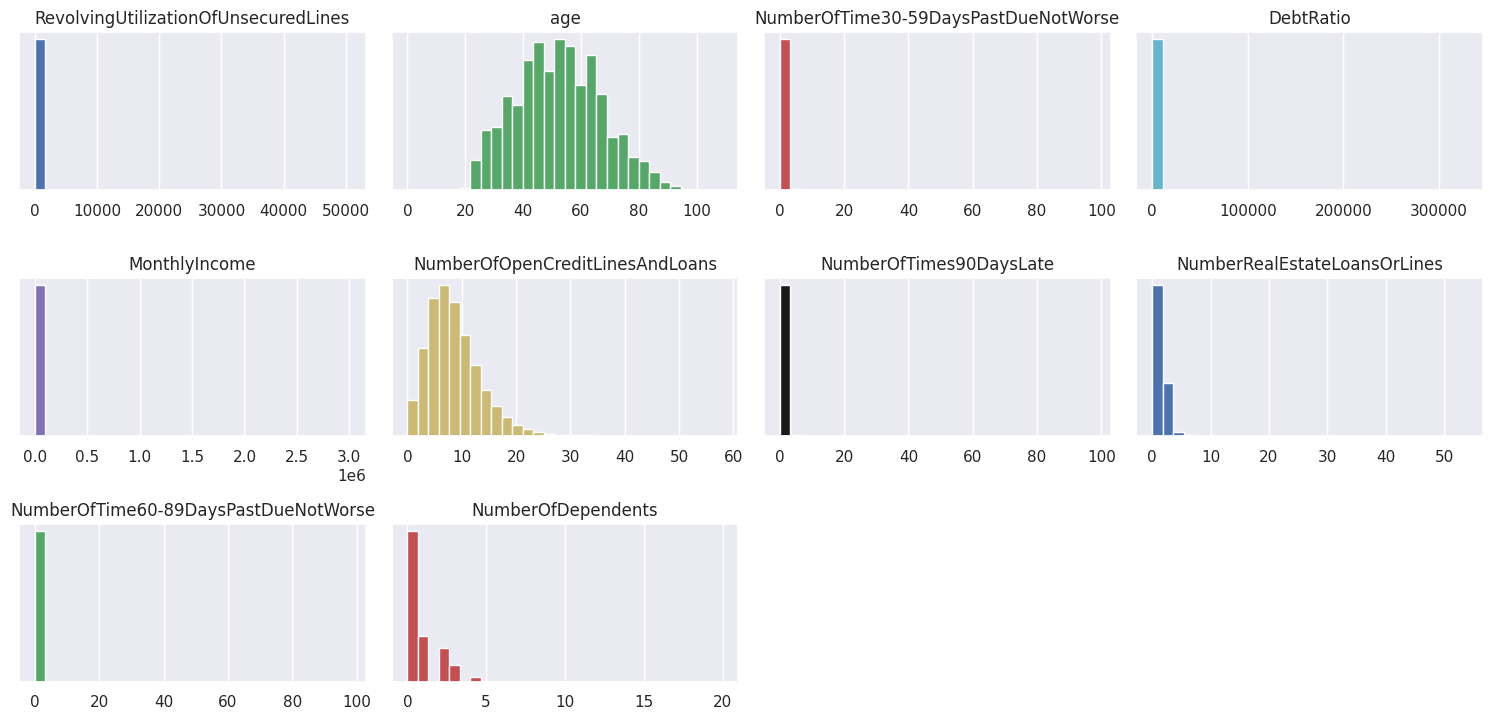

In [ ]:
fig = plt.figure(figsize=(15, 12))
for i in range(0, len(cols)):
    plt.subplot(5, 4, i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)

    plt.hist(df[cols[i]], bins=30, color=colors[i])
    plt.title(cols[i])

plt.tight_layout()

In [ ]:
x=df.drop([ 'NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1)
x

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,6,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,1,0.0
...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,1,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,1,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,1,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0.0


In [ ]:
x.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberRealEstateLoansOrLines                0
NumberOfDependents                       3924
dtype: int64

In [ ]:
x.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberRealEstateLoansOrLines              int64
NumberOfDependents                      float64
dtype: object

In [ ]:
x = x.fillna((df.mean()))
x.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,6,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,1,0.0


In [ ]:
x.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

**Correlation**

In [ ]:
x[x.columns[1:]].corr()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,0.006565,-0.011281,0.006235,0.001539
age,-0.005898,1.000000,-0.062995,0.024188,0.032984,0.147705,0.033150,-0.208102
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.007636,-0.055312,-0.030565,-0.002525
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.005355,0.049565,0.120046,-0.038287
MonthlyIncome,0.006565,0.032984,-0.007636,-0.005355,1.000000,0.082319,0.113823,0.058542
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,0.082319,1.000000,0.433959,0.064507
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.113823,0.433959,1.000000,0.123370
NumberOfDependents,0.001539,-0.208102,-0.002525,-0.038287,0.058542,0.064507,0.123370,1.000000


<Axes: >

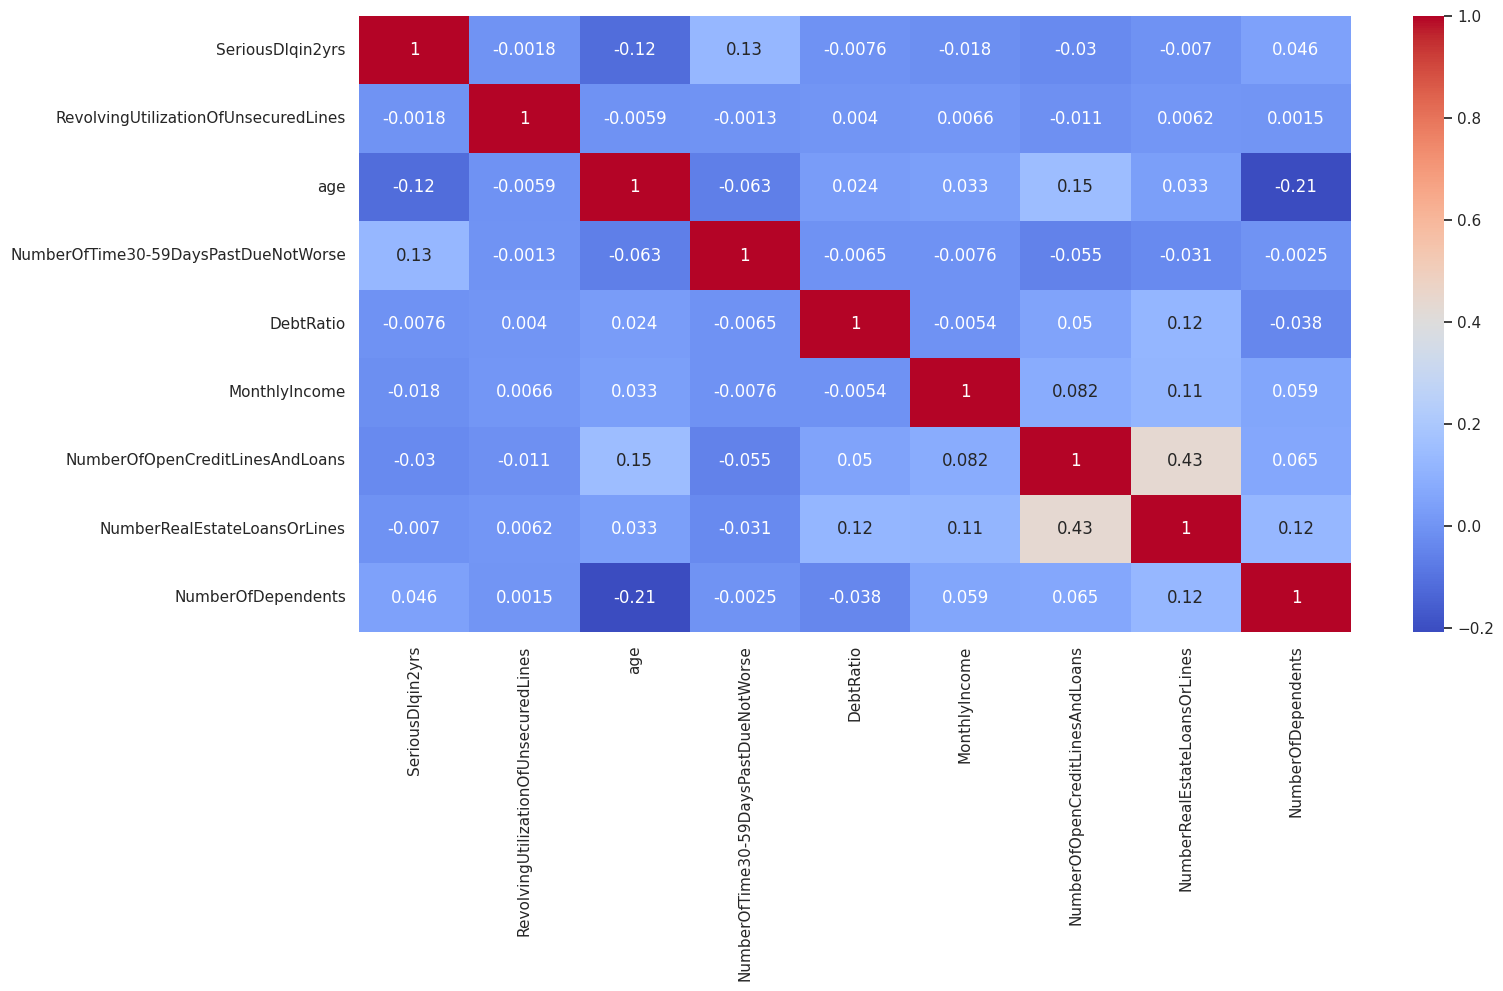

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(x.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


**Machine Learning Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
X = x.drop('SeriousDlqin2yrs', axis=1)
y = x.SeriousDlqin2yrs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None,
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [ ]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [ ]:
pred_logit = glmMod.predict(X_test)

In [ ]:
import joblib

joblib.dump(glmMod, 'logistic.joblib')

['logistic.joblib']

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

print("The accuracy of  model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of  model is: 0.9342133333333333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35029
           1       0.53      0.02      0.03      2471

    accuracy                           0.93     37500
   macro avg       0.73      0.51      0.50     37500
weighted avg       0.91      0.93      0.90     37500



**ROC Curve**

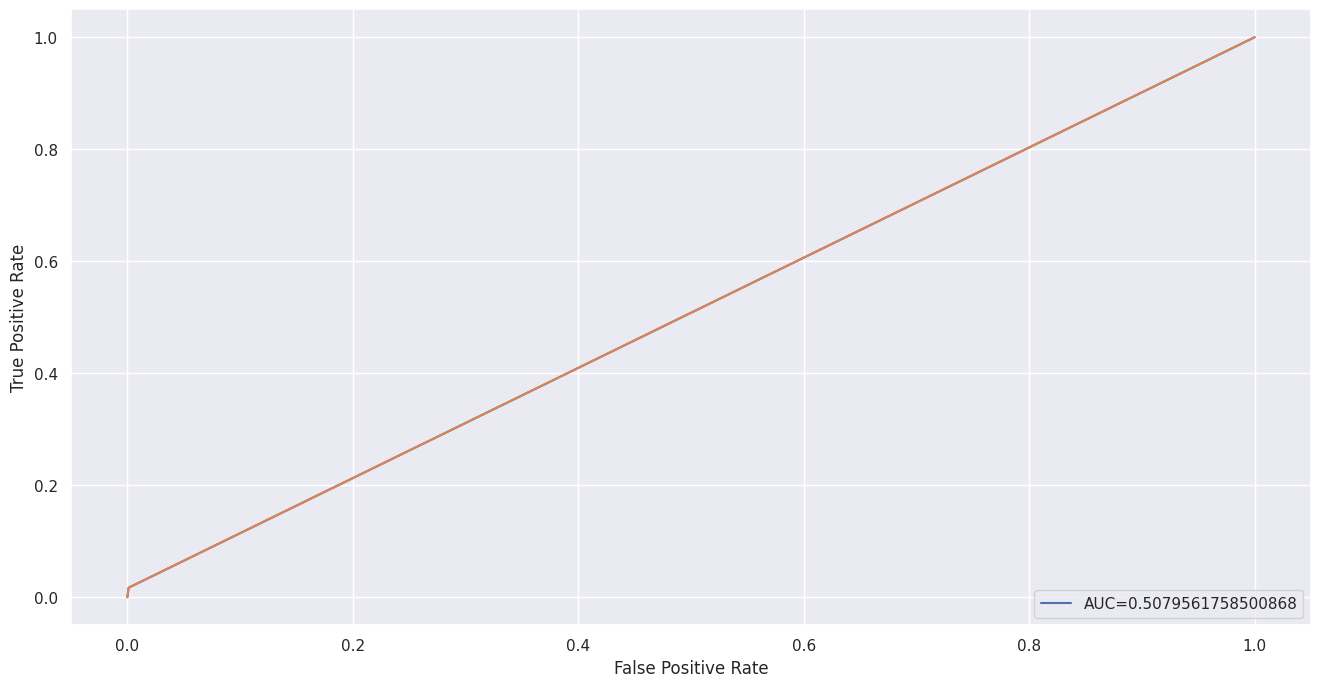

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, pred_logit)
auc=metrics.roc_auc_score(y_test,pred_logit)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Confusion matrix**

In [ ]:
cm = metrics.confusion_matrix(y_test, pred_logit)
print(cm)

[[34991    38]
 [ 2429    42]]


The accuracy of prediction is:  0.9342133333333333


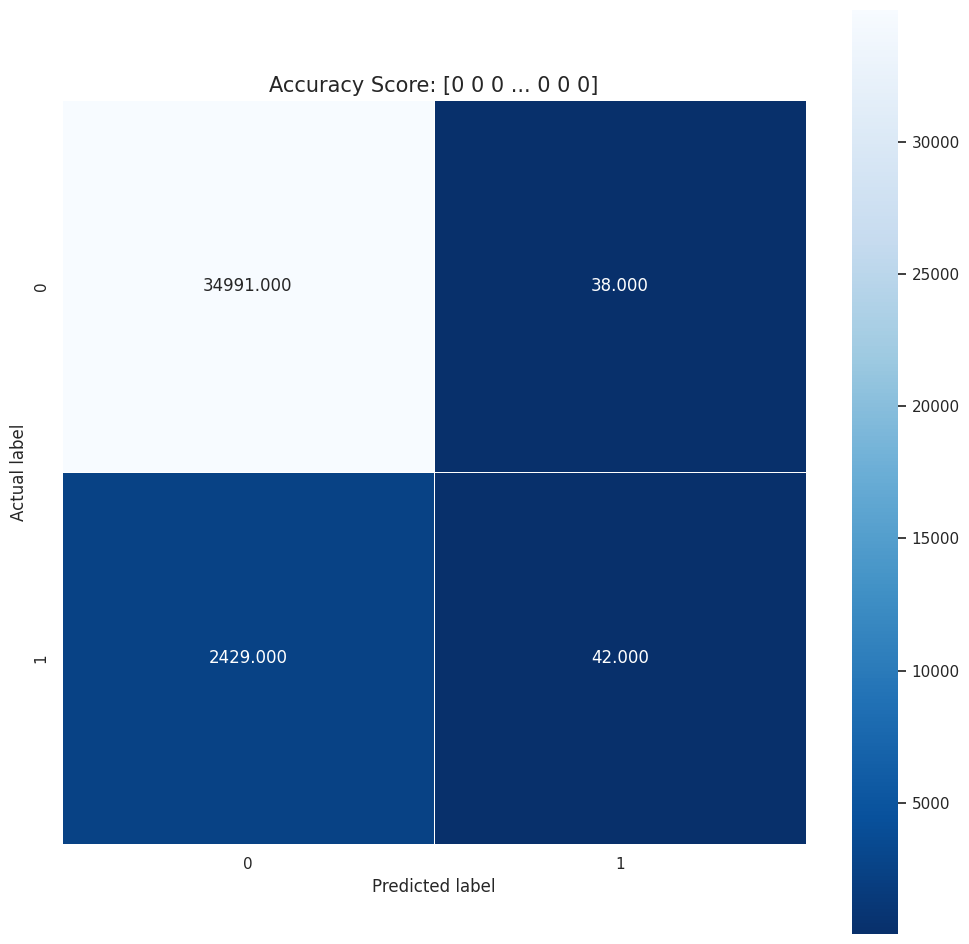

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.set(font_scale = 1.0)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(pred_logit)
plt.title(all_sample_title, size = 15);

accuracy = accuracy_score(y_test, pred_logit)
print("The accuracy of prediction is: ", accuracy)

**KNeighbors Classification**

In [ ]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [ ]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knMod.score(X_test, y_test)

0.9311466666666667

In [ ]:
y_pred_kn = knMod.predict(X_test)

In [ ]:
print("The accuracy of  model is:", accuracy_score(y_test, y_pred_kn))
print(classification_report(y_test, y_pred_kn))

The accuracy of  model is: 0.9311466666666667
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     35029
           1       0.21      0.02      0.03      2471

    accuracy                           0.93     37500
   macro avg       0.57      0.51      0.50     37500
weighted avg       0.89      0.93      0.90     37500



**ROC Curve**

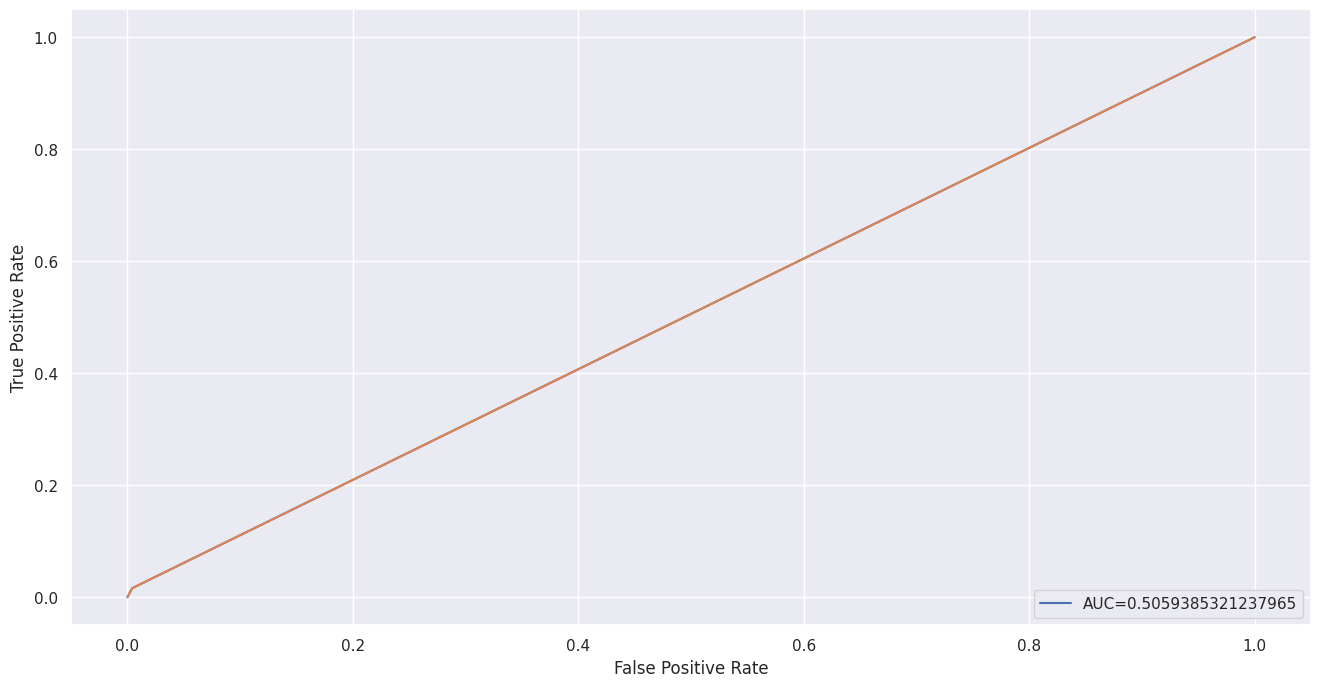

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_kn)
auc=metrics.roc_auc_score(y_test,y_pred_kn)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_kn)
print(cm)

[[34878   151]
 [ 2431    40]]


The accuracy of prediction is:  0.9311466666666667


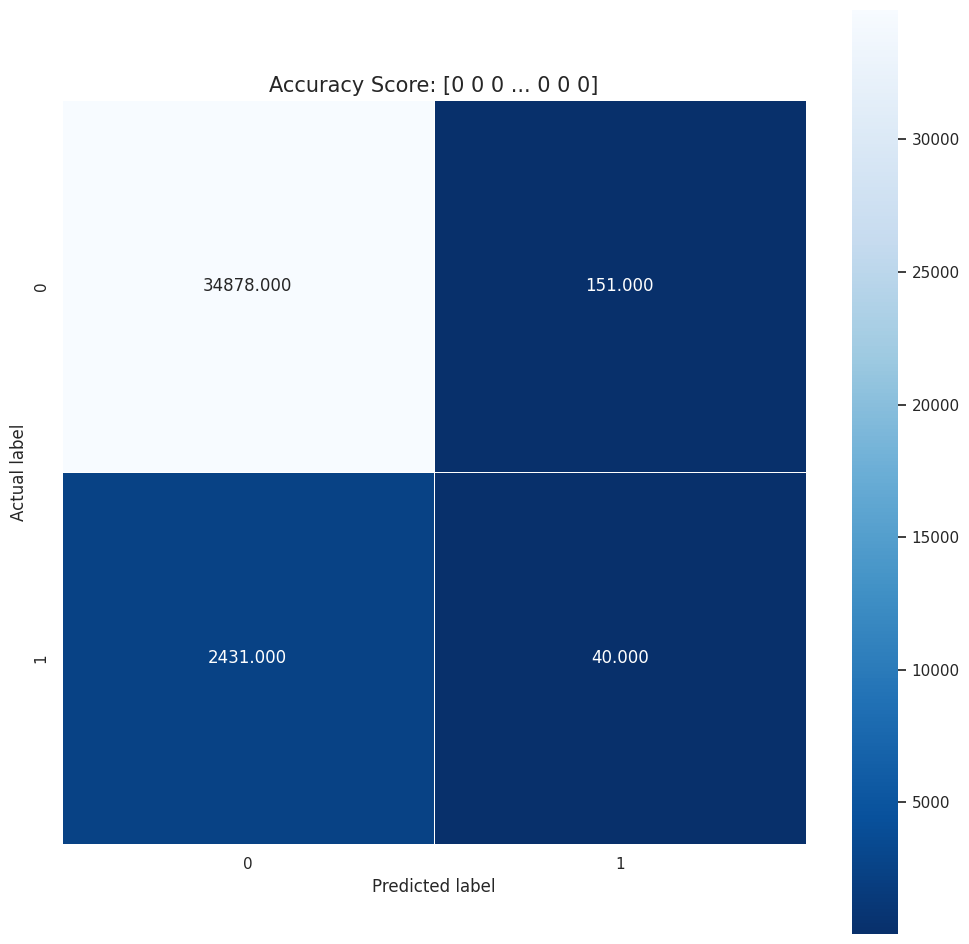

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.set(font_scale = 1.0)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(y_pred_kn)
plt.title(all_sample_title, size = 15);

accuracy = accuracy_score(y_test, y_pred_kn)
print("The accuracy of prediction is: ", accuracy)

**Gradient boosting classification**

In [ ]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [ ]:
gbMod.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(loss='deviance', n_estimators=200)

In [ ]:
gbMod.score(X_test, y_test)

0.9356533333333333

In [ ]:
y_pred_gb = gbMod.predict(X_test)

In [ ]:
print("The accuracy of  model is:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

The accuracy of  model is: 0.9356533333333333
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35029
           1       0.57      0.10      0.17      2471

    accuracy                           0.94     37500
   macro avg       0.75      0.55      0.57     37500
weighted avg       0.92      0.94      0.91     37500



**ROC Curve**

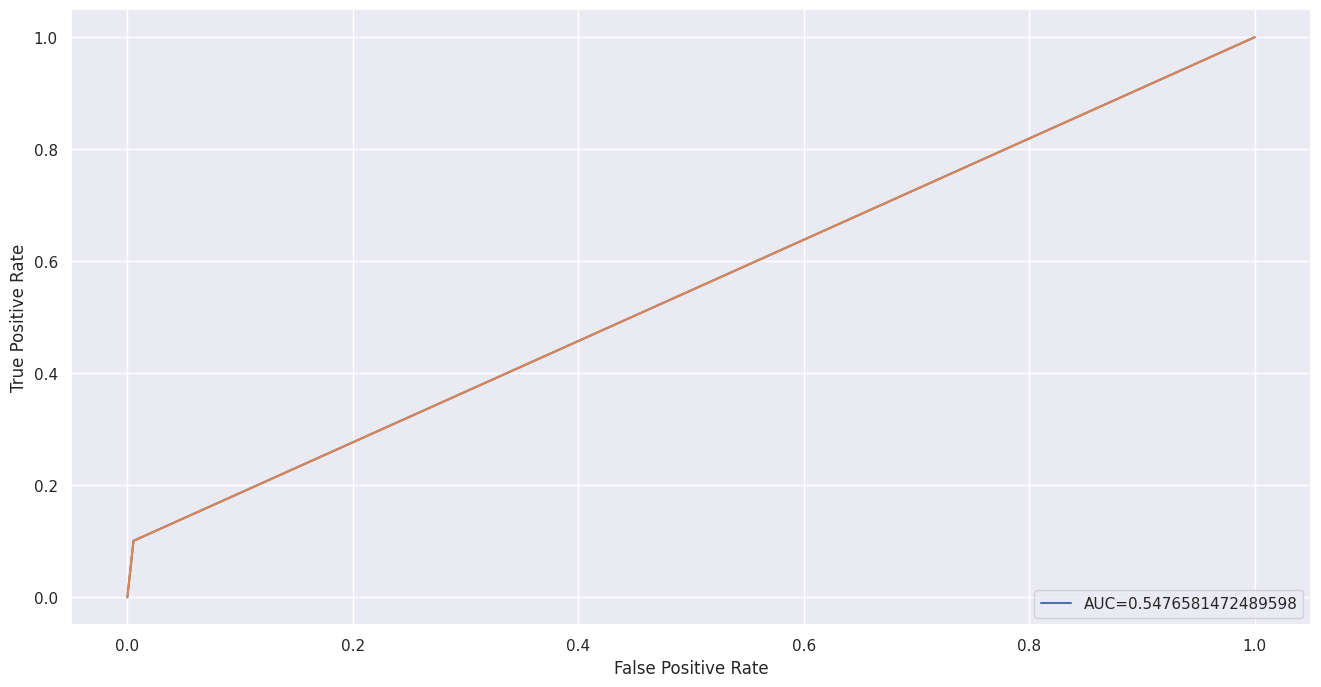

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_gb)
auc=metrics.roc_auc_score(y_test,y_pred_gb)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Confusion Matrix**

The accuracy of prediction is:  0.9356533333333333


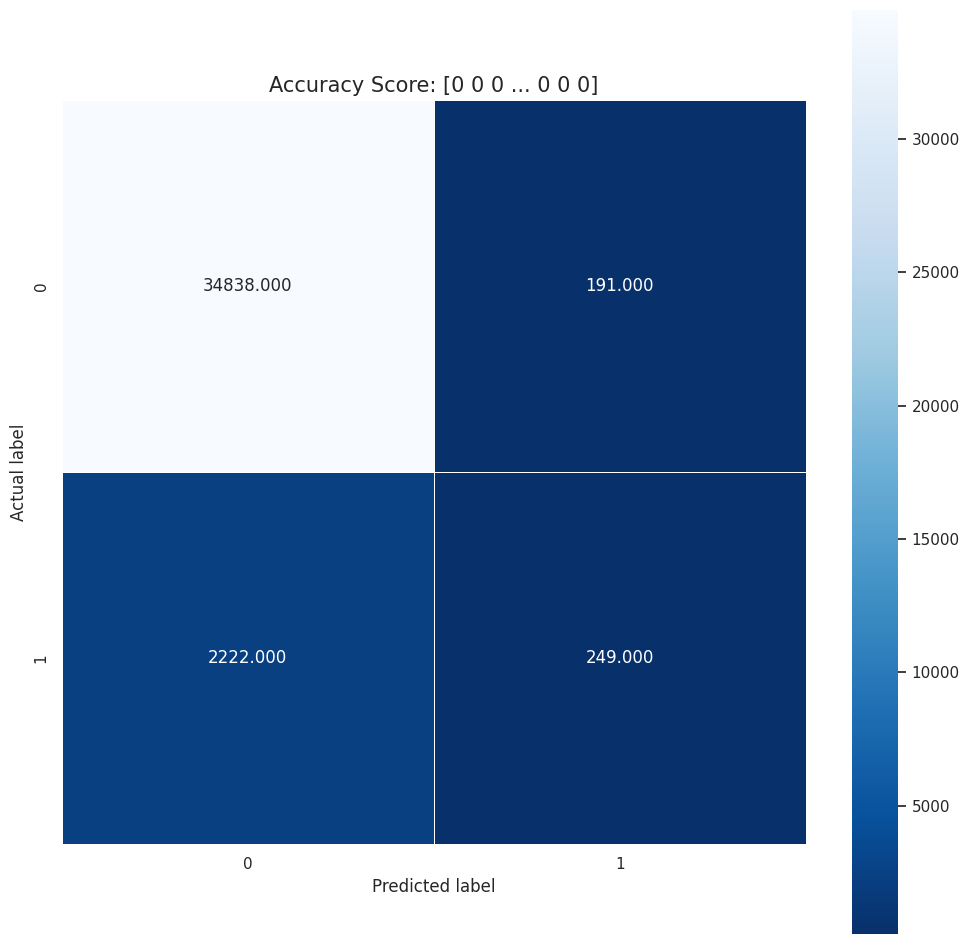

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.set(font_scale = 1.0)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(y_pred_gb)
plt.title(all_sample_title, size = 15);

accuracy = accuracy_score(y_test, y_pred_gb)
print("The accuracy of prediction is: ", accuracy)

**Random forest classifier**

In [ ]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1,
                               random_state=None, verbose=0)

In [ ]:
rfMod.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1)

In [ ]:
rfMod.score(X_test, y_test)

0.9326666666666666

In [ ]:
y_pred_rf = rfMod.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_rf))

0.9326666666666666


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]


feature_cols = list(x.columns)
feature_cols.remove('SeriousDlqin2yrs')

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,
                out_file='tree.dot',
                feature_names = feature_cols,
                class_names = 'SeriousDlqin2yrs',
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')'''

"from sklearn.ensemble import RandomForestClassifier\nmodel = RandomForestClassifier(n_estimators=10)\n# Train\nmodel.fit(X_train, y_train)\n# Extract single tree\nestimator = model.estimators_[5]\n\n\nfeature_cols = list(x.columns)\nfeature_cols.remove('SeriousDlqin2yrs')\n\nfrom sklearn.tree import export_graphviz\n# Export as dot file\nexport_graphviz(estimator,\n                out_file='tree.dot',\n                feature_names = feature_cols,\n                class_names = 'SeriousDlqin2yrs',\n                rounded = True, proportion = False,\n                precision = 2, filled = True)\n\nfrom subprocess import call\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])\n\n# Display in jupyter notebook\nfrom IPython.display import Image\nImage(filename = 'tree.png')"

**ROC Curve**

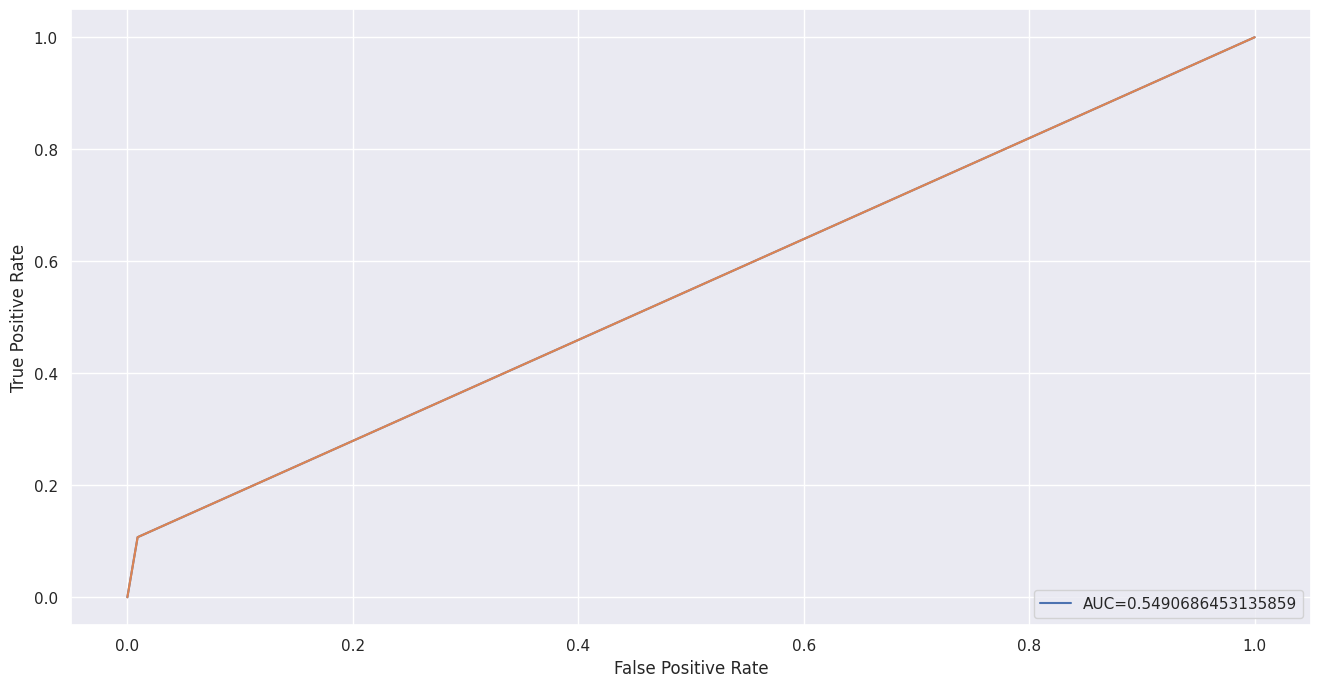

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rf)
auc=metrics.roc_auc_score(y_test,y_pred_rf)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Confusion Matrix**

The accuracy of prediction is:  0.9326666666666666


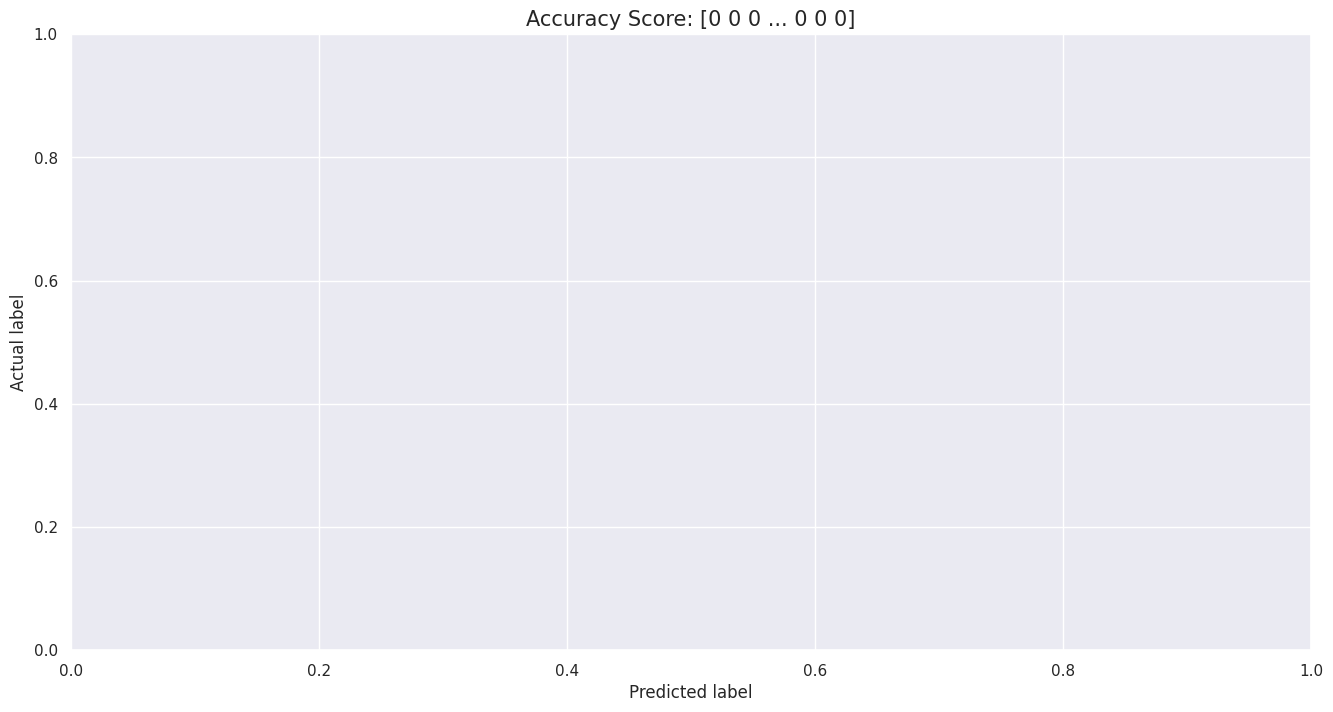

In [ ]:
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(y_pred_rf)
plt.title(all_sample_title, size = 15);

accuracy = accuracy_score(y_test, y_pred_rf)
print("The accuracy of prediction is: ", accuracy)

**Decision Tree**

In [ ]:
'''import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Assuming you have a DecisionTreeClassifier named 'model'
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # You need to train the model first

# DOT data
feature_cols = list(X_train.columns)
dot_data = export_graphviz(model, out_file=None,
                           feature_names=feature_cols,
                           class_names=['0', '1'],
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphviz")'''

'import graphviz\nfrom sklearn.tree import DecisionTreeClassifier, export_graphviz\n\n# Assuming you have a DecisionTreeClassifier named \'model\'\nmodel = DecisionTreeClassifier()\nmodel.fit(X_train, y_train)  # You need to train the model first\n\n# DOT data\nfeature_cols = list(X_train.columns)\ndot_data = export_graphviz(model, out_file=None,\n                           feature_names=feature_cols,\n                           class_names=[\'0\', \'1\'],\n                           filled=True)\n\n# Draw graph\ngraph = graphviz.Source(dot_data, format="png")\ngraph.render("decision_tree_graphviz")'

**Ada boost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaMod = AdaBoostClassifier( n_estimators=200, learning_rate=1.0)
adaMod.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=200)

In [ ]:
adaMod.score(X_test, y_test)

0.9346133333333333

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)


mlp.fit(X_train,y_train)

ypred=mlp.predict(X_test)


accuracy_score(y_test,ypred)

Iteration 1, loss = 0.56737310
Iteration 2, loss = 0.24741715
Iteration 3, loss = 0.24598246
Iteration 4, loss = 0.24594423
Iteration 5, loss = 0.24593169
Iteration 6, loss = 0.26019446
Iteration 7, loss = 0.24582514
Iteration 8, loss = 0.24587183
Iteration 9, loss = 0.24581355
Iteration 10, loss = 0.24572355
Iteration 11, loss = 0.24617809
Iteration 12, loss = 0.24591428
Iteration 13, loss = 0.24585349
Iteration 14, loss = 0.24601419
Iteration 15, loss = 0.24603548
Iteration 16, loss = 0.24582140
Iteration 17, loss = 0.24591042
Iteration 18, loss = 0.24613463
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.9341066666666666

**LSTM**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler


X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/20
2813/2813 [==============================] - 28s 9ms/step - loss: 0.2156 - accuracy: 0.9321 - val_loss: 0.1984 - val_accuracy: 0.9334
Epoch 2/20
2813/2813 [==============================] - 24s 9ms/step - loss: 0.1995 - accuracy: 0.9331 - val_loss: 0.1951 - val_accuracy: 0.9328
Epoch 3/20
2813/2813 [==============================] - 23s 8ms/step - loss: 0.1985 - accuracy: 0.9331 - val_loss: 0.2005 - val_accuracy: 0.9330
Epoch 4/20
2813/2813 [==============================] - 25s 9ms/step - loss: 0.1980 - accuracy: 0.9332 - val_loss: 0.1928 - val_accuracy: 0.9332
Epoch 5/20
2813/2813 [==============================] - 24s 9ms/step - loss: 0.1971 - accuracy: 0.9334 - val_loss: 0.1937 - val_accuracy: 0.9336
Epoch 6/20
2813/2813 [==============================] - 26s 9ms/step - loss: 0.1970 - accuracy: 0.9339 - val_loss: 0.1921 - val_accuracy: 0.9328
Epoch 7/20
2813/2813 [==============================] - 23s 8ms/step - loss: 0.1967 - accuracy: 0.9335 - val_loss: 0.1923 - val_ac

**Testing data**

In [ ]:
test_data = pd.read_csv('/content/cs-test.csv').drop('Unnamed: 0', axis = 1)
test_data.fillna((x.mean()), inplace=True)

In [ ]:
a = test_data.drop(['SeriousDlqin2yrs','NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [ ]:
#x=df.drop(['Unnamed: 0', 'NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse'], axis=1)
#x

In [ ]:
a

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0.885519,43,0,0.177513,5700.000000,4,0,0.000000
1,0.463295,57,0,0.527237,9141.000000,15,4,2.000000
2,0.043275,59,0,0.687648,5083.000000,12,1,2.000000
3,0.280308,38,1,0.925961,3200.000000,7,2,0.000000
4,1.000000,27,0,0.019917,3865.000000,4,0,1.000000
...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.000000,5,0,0.000000
101499,0.922156,36,3,0.934217,7615.000000,8,2,4.000000
101500,0.081596,70,0,836.000000,6670.221237,3,0,0.757222
101501,0.335457,56,0,3568.000000,6670.221237,8,2,3.000000


In [ ]:
a.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

In [ ]:
test_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [ ]:

# pred = test_data.data.frame(predict(logistic.step,type = "response"))
# names(pred)[1] <- "prediction"
# SeriousDlqin2yrs= ifelse(pred>0.5,1,0)

# a = confusionMatrix(test_data.factor(SeriousDlqin2yrs), test_data.factor(RevolvingUtilizationOfUnsecuredLines),positive="1")

In [ ]:
a.shape

(101503, 8)

In [ ]:
pred_logit2= glmMod.predict(a)
pred_logit2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
K = list(pred_logit2)

In [ ]:
a['SeriousDlqin2yrs'] = K

In [ ]:
a

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,SeriousDlqin2yrs
0,0.885519,43,0,0.177513,5700.000000,4,0,0.000000,0
1,0.463295,57,0,0.527237,9141.000000,15,4,2.000000,0
2,0.043275,59,0,0.687648,5083.000000,12,1,2.000000,0
3,0.280308,38,1,0.925961,3200.000000,7,2,0.000000,0
4,1.000000,27,0,0.019917,3865.000000,4,0,1.000000,0
...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.000000,5,0,0.000000,0
101499,0.922156,36,3,0.934217,7615.000000,8,2,4.000000,0
101500,0.081596,70,0,836.000000,6670.221237,3,0,0.757222,0
101501,0.335457,56,0,3568.000000,6670.221237,8,2,3.000000,0


**Score card**

In [ ]:
def calculate_credit_score(debt_ratio, income, days_past_due):
    # Set credit score ranges and corresponding values
    credit_score_ranges = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 150), (151, 180)]
    credit_score_values = [800, 750, 700, 650, 600, 550]

    # Calculate credit score based on debt ratio, income, and number of days past due
    if debt_ratio <= 0.3 and income >= 50000 and days_past_due == 0:
        credit_score = 800
    else:
        total_score = 0
        for i in range(len(credit_score_ranges)):
            if days_past_due >= credit_score_ranges[i][0] and days_past_due <= credit_score_ranges[i][1]:
                total_score += credit_score_values[i]
        if debt_ratio >= 0.5:
            total_score -= 100
        elif debt_ratio >= 0.4:
            total_score -= 50
        if income < 10000:
            total_score -= 400
        elif income > 10000:
            total_score -= 300
        elif income > 20000:
            total_score -= 200
        elif income > 30000:
            total_score -= 150
        elif income > 40000:
            total_score -= 100
        credit_score = max(300, total_score)

    return credit_score

# Load data
data = pd.read_csv('/content/cs-test.csv')

# Calculate credit scores for each row in data
credit_scores = []
for index, row in data.iterrows():
    debt_ratio = row['DebtRatio']
    income = row['MonthlyIncome']
    days_past_due = row['NumberOfTime30-59DaysPastDueNotWorse']
    credit_score = calculate_credit_score(debt_ratio, income, days_past_due)
    credit_scores.append(credit_score)

# Add credit scores to data
data['credit_score'] = credit_scores

# Print data with credit scores
print(data)

        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1               NaN                              0.885519   
1                2               NaN                              0.463295   
2                3               NaN                              0.043275   
3                4               NaN                              0.280308   
4                5               NaN                              1.000000   
...            ...               ...                                   ...   
101498      101499               NaN                              0.282653   
101499      101500               NaN                              0.922156   
101500      101501               NaN                              0.081596   
101501      101502               NaN                              0.335457   
101502      101503               NaN                              0.441842   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio 